In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('June.csv')

In [2]:
import  matplotlib.pyplot as plt
from sklearn import preprocessing

In [3]:
feature = data[['ITEM_PRICE','ITEM_SALES_VOLUME','Label1','Label2','Label3','Label4','Label5']]
label = data[['label']]
#名字单独保存，以备后患
feature_list=list(feature.columns)
#转换成合适的格式
feature = np.array(feature)
label = np.array(label)

In [4]:
#数据集切分
from sklearn.model_selection import train_test_split
train_features,test_features,train_labels,test_labels=train_test_split(feature,label,test_size=0.1,random_state=42)
print('训练集特征',train_features.shape)
print('训练集标签',train_labels.shape)
print('测试集特征',test_features.shape)
print('测试集标签',test_labels.shape)

训练集特征 (265652, 7)
训练集标签 (265652, 1)
测试集特征 (29517, 7)
测试集标签 (29517, 1)


In [5]:
#随机森林分类模型
#导入算法
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#建模
rf=RandomForestClassifier(random_state=42)
cf = DecisionTreeClassifier(random_state=42)
#训练
rf.fit(train_features,train_labels)
cf.fit(train_features,train_labels)
#预测结果
predictions=rf.predict(test_features)
#计算误差
#errors=abs(predictions-test_labels)
#测试结果
score_r = rf.score(test_features,test_labels)
score_c = cf.score(test_features,test_labels)
#mean absolute percentage error(MAPE) 平均绝对百分误差
# mape=100*(errors/test_labels)
# print('MAPE:',np.mean(mape))
# errors
print("Random Forest:{}".format(score_r),
      "Decision Tree:{}".format(score_c)
      )
# rf.feature_importances_
# rf.apply(test_features)
# rf.predict(test_features)
# rf.predict_proba(test_features)

<ipython-input-5-329386228b57>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(train_features,train_labels)


Random Forest:0.9994918182742148 Decision Tree:0.9991530304570247


In [6]:
#得到特征重要性
importances=list(rf.feature_importances_)
# print(importances)
#转换格式
feature_importances=[(feature,round(importance,2)) for feature,importance in zip(feature_list,importances)]
#排序
feature_importances=sorted(feature_importances,key=lambda x:x[1],reverse=True)
#对应进行打印
[print('Variable:{:20} Importance:{}'.format(*pair)) for pair in feature_importances]

Variable:ITEM_PRICE           Importance:0.47
Variable:ITEM_SALES_VOLUME    Importance:0.41
Variable:Label3               Importance:0.04
Variable:Label2               Importance:0.03
Variable:Label4               Importance:0.03
Variable:Label1               Importance:0.02
Variable:Label5               Importance:0.01


[None, None, None, None, None, None, None]

Text(0.5, 1.0, 'Variable Importance')

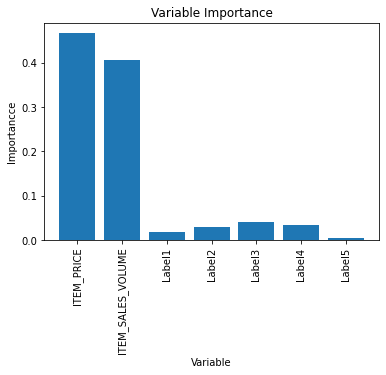

In [7]:
#转换成list格式
x_values=list(range(len(importances)))
#绘图
plt.bar(x_values,importances,orientation='vertical')
#x轴名字
plt.xticks(x_values,feature_list,rotation='vertical')
#图题
plt.xlabel('Variable')
plt.ylabel('Importancce')
plt.title('Variable Importance')

Text(0.5, 1.0, 'Cumulative Importances')

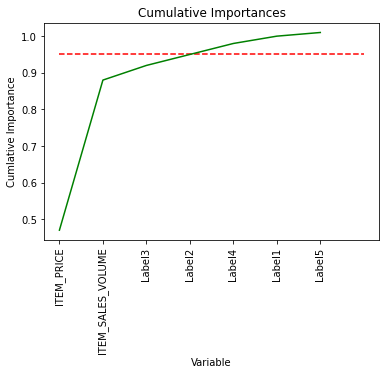

In [8]:
#对特征进行排序
sorted_importances=[importance[1] for importance in feature_importances]
sorted_features=[importance[0] for importance in feature_importances]
#累计重要性
cumulative_importances=np.cumsum(sorted_importances)
#绘制折线图
plt.plot(x_values,cumulative_importances,'g-')
#画一条y=0.95的红线
plt.hlines(y=0.95,xmin=0,xmax=len(sorted_importances),color='r',linestyles='dashed')
#x轴
plt.xticks(x_values,sorted_features,rotation='vertical')
#y轴
plt.xlabel('Variable')
plt.ylabel('Cumlative Importance')
plt.title('Cumulative Importances')

In [24]:
# importance_name=[feature[0] for feature in feature_importances[0:4]]
# importance_indices=[feature_list.index(feature) for feature in importance_name]
# importance_train_features=train_features[:,importance_indices]
# importance_test_features=test_features[:,importance_indices]
# rf.fit(importance_train_features,train_labels)
# rf.score(importance_test_features,test_labels)

<ipython-input-24-b3099823fd5e>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(importance_train_features,train_labels)


0.9993901819290578

In [12]:
# data6 = pd.read_csv('August.csv')
# features_=data6[['ITEM_PRICE','ITEM_SALES_VOLUME','Label1','Label2','Label3','Label4','Label5']]
# feature6=np.array(features_)
# predictions=rf.predict(feature6)
# data6['label']=predictions
# data6.to_csv('August1.csv')
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [21]:
n_estimator=[800]
max_features=['auto','sqrt']
max_depth=[int(x) for x in np.linspace(start=200,stop=2000,num=10)]
max_depth.append(None)
min_sample_split=[2,5,10]
min_sample_leaf=[1,2,4]
bootstrap=[True,False]
random_grid={
        'bootstrap':bootstrap,
    'max_depth':max_depth,
    'max_features':['auto','sqrt'],
    'min_samples_leaf':min_sample_leaf,
    'min_samples_split':min_sample_split,
    'n_estimators':n_estimator
}
rf=RandomForestClassifier(random_state=42)
rf_random=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,scoring='neg_mean_absolute_error',random_state=42,cv=3,n_jobs=-1,verbose=2)
rf_random.fit(train_features,train_labels)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


KeyboardInterrupt: 

In [15]:
param_grid={
#     'bootstrap':[True],
#     'max_depth':[8,10,12],
#     'max_features':['auto'],
#     'min_samples_leaf':[2],
#     'min_samples_split':[3,4],
    'n_estimators':[700,800,900]
}
rf=RandomForestClassifier(random_state=42)
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,scoring='neg_mean_absolute_error',cv=3,n_jobs=-1,verbose=2)
grid_search.fit(train_features,train_labels)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


D:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'n_estimators': [700, 800, 900]},
             scoring='neg_mean_absolute_error', verbose=2)

In [17]:
grid_search.best_params_

{'n_estimators': 800}

In [ ]:
best_grid=grid_search.best_estimator_
evaluate(best_grid,test_features,test_labels)